# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

#### Codice

I codici relativi all'esercizio sono contenuti nelle due directory uniform e gaussian; i due codici sono identici, cambia solo il metodo di generazione casuale dello step Metropolis, generato da una distribuzione uniforme nel primo caso, Gaussiana nel secondo; il codice è composto da:

1- La solita classe Random;
2- la classe Autofunzione, in cui sono implementati i metodi per valutare le due autofunzioni richieste
3- Metropolis.cpp, in cui implemento l'algoritmo di Metropolis per le due autofunzioni ed eseguo il data-blocking per la stima del valor medio di r

I codici sono commentati passo per passo.

Ho svolto l'esercizio nel seguente modo:

- Per prima cosa ho calibrato la probabilità di transizione in modo da ottenere accettanza dell'algoritmo di circa 50%;

- Ho provato a cambiare il punto di partenza, utilizzando dapprima un punto tale da essere a distanza pari a circa $<r>$ dall'origine, poi partendo dall'origine e quindi da un punto molto distante dall'origine, facendo anche variare il numero di step Metropolis, ed ho notato che: la scelta del punto di partenza non influisce di molto sull'accettanza, ma partire da un punto molto lontano dall'origine richiede un maggior numero di step Metropolis per raggiungere una stima di r buona quanto quella eseguita partendo da un punto ragionevole; partire dall'origine non cambia di molto nè l'accettanza nè la stima finale di r, ma rimane tuttavia una situazione non fisica in quanto nell'origine dovrebbe esserci il nucleo dell'atomo, in questo caso il protone;

- Fatte queste considerazioni, ho fissato a 1000000 il numero di step e a 500 il numero di blocchi, ho fissato i parametri della probabilità di transizione in modo da avere accettanza vicina al 50% e ho fissato il punto di partenza ad un punto tale da essere distante dall'origine circa il valore atteso di r, quindi ho lanciato il codice e svolto l'esercizio; di seguito riporto prima i grafici ottenuti salvando il valore delle coordinate (ogni 10 step) per entrambe le autofunzioni e per entrambe le prob. di transizione, poi i grafici che riportano l'andamento della stima del valor medio di r.

#### RIsultati: distribuzioni spaziali

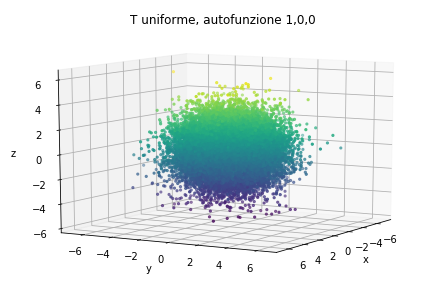

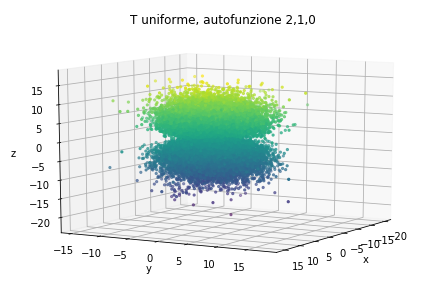

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X=np.loadtxt("uniform/X_100.dat")
Y=np.loadtxt("uniform/Y_100.dat")
Z=np.loadtxt("uniform/Z_100.dat")

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title("T uniforme, autofunzione 1,0,0")
plt.show()

X2=np.loadtxt("uniform/X_210.dat")
Y2=np.loadtxt("uniform/Y_210.dat")
Z2=np.loadtxt("uniform/Z_210.dat")

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X2, Y2, Z2, c=Z2, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title("T uniforme, autofunzione 2,1,0")
plt.show()

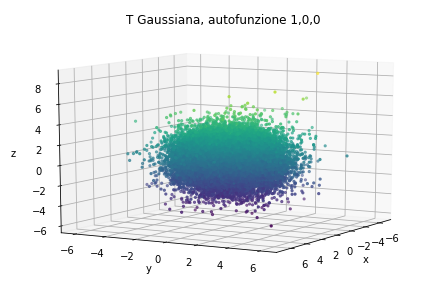

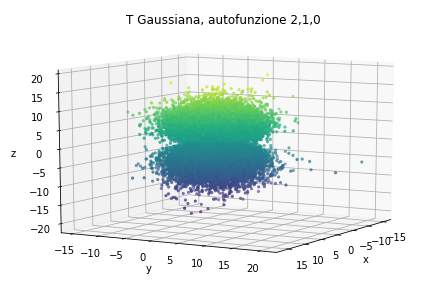

In [5]:
X=np.loadtxt("Gaussian/X_100.dat")
Y=np.loadtxt("Gaussian/Y_100.dat")
Z=np.loadtxt("Gaussian/Z_100.dat")

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title("T Gaussiana, autofunzione 1,0,0")
plt.show()

X2=np.loadtxt("Gaussian/X_210.dat")
Y2=np.loadtxt("Gaussian/Y_210.dat")
Z2=np.loadtxt("Gaussian/Z_210.dat")

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X2, Y2, Z2, c=Z2, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title("T Gaussiana, autofunzione 2,1,0")
plt.show()

#### Risultati

Riporto prima i parametri che ho utilizzato per le prese dati;

Per la probabilità di transizione uniforme:

- Autofunzione 1,0,0: Delta = 1.225;    Accettanza = 50.0387%;
- Autofunzione 2,1,0: Delta = 3;        Accettanza = 49.7408%;

Per la probabilità di transizione Gaussiana (a media nulla):

- Autofunzione 1,0,0: Sigma = 0.75;     Accettanza = 50,5482%;
- Autofunzione 2,1,0: Sigma = 1.85;     Accettanza = 50,4665%;

L'accettanza è calcolata con un contatore, che conta +1 ogni volta che la mossa Metropolis è accettata, e stampata a terminale come rapporto tra il valore del contatore al termine del ciclo di step Metropolis e il numero totale degli step.

Riporto ora i grafici per l'andamento della stima a blocchi del valor medio di r.

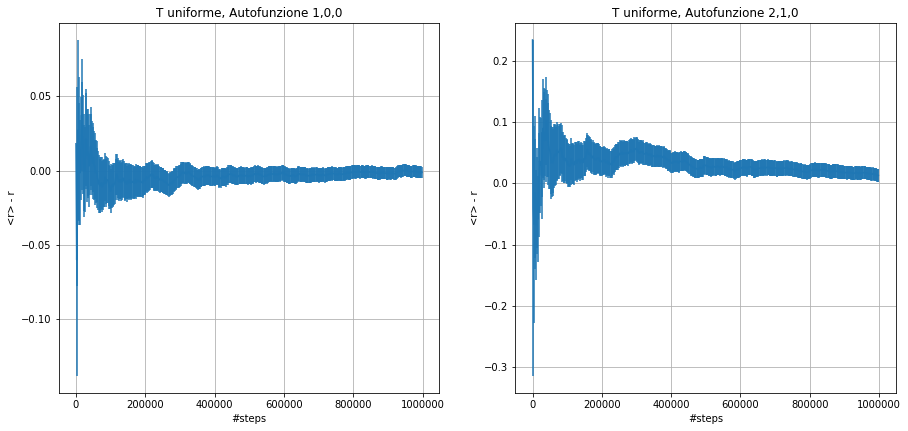

In [8]:
w = np.arange(500)
w*=2000

A100 = np.loadtxt("uniform/mean_100.dat")
sA100 = np.loadtxt("uniform/sigma_100.dat")
A210 = np.loadtxt("uniform/mean_210.dat")
sA210 = np.loadtxt("uniform/sigma_210.dat")


plt.figure(figsize=[15,6.8])
plt.subplot(1,2,1)
plt.errorbar(w,A100 - 1.5,yerr=sA100)
plt.title("T uniforme, Autofunzione 1,0,0")
plt.xlabel('#steps')
plt.ylabel('<r> - r')
plt.grid(True)
plt.subplot(1,2,2)
plt.errorbar(w,A210 -5,yerr=sA210)
plt.title("T uniforme, Autofunzione 2,1,0")
plt.xlabel('#steps')
plt.ylabel('<r> - r')
plt.grid(True)
plt.show()

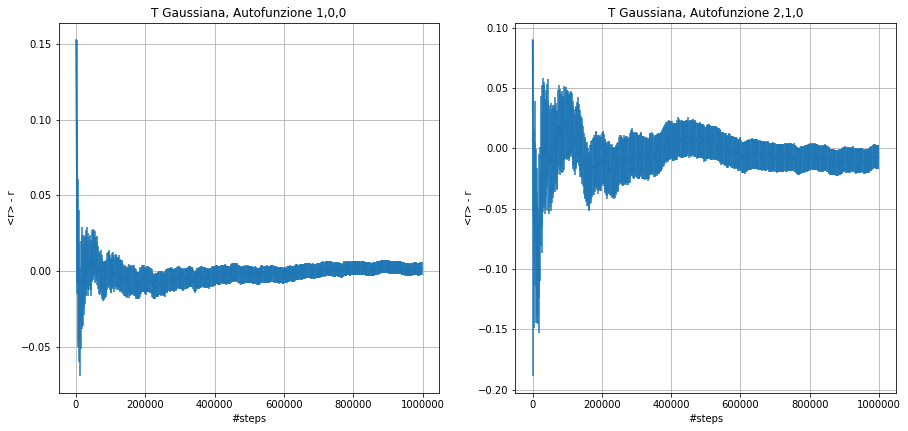

In [9]:
GA100 = np.loadtxt("Gaussian/mean_100.dat")
GsA100 = np.loadtxt("Gaussian/sigma_100.dat")
GA210 = np.loadtxt("Gaussian/mean_210.dat")
GsA210 = np.loadtxt("Gaussian/sigma_210.dat")


plt.figure(figsize=[15,6.8])
plt.subplot(1,2,1)
plt.errorbar(w,GA100 - 1.5,yerr=GsA100)
plt.title("T Gaussiana, Autofunzione 1,0,0")
plt.xlabel('#steps')
plt.ylabel('<r> - r')
plt.grid(True)
plt.subplot(1,2,2)
plt.errorbar(w,GA210 -5,yerr=GsA210)
plt.title("T Gaussiana, Autofunzione 2,1,0")
plt.xlabel('#steps')
plt.ylabel('<r> - r')
plt.grid(True)
plt.show()

Si può vedere dai grafici, soprattutto quelli riguardanti l'autofunzione 2,1,0, che la convergenza al valore atteso è migliore per probabilità di transizione Gaussiana; per l'autofunzione 1,0,0 non si notano differenze evidenti.